### Introduction and Innovation Highlight  

**🌐 Transparent Communicable Disease Prediction with XStacked 🌐**  

Our innovative solution combines transparency, accessibility, and adaptability to transform healthcare. Leveraging an **XStacked ensemble model**, it delivers accurate communicable disease predictions with a focus on explainability and user-centric design.  

**What Sets Us Apart?**  
1. **Transparent AI Insights:** Methods like **LIME** make complex predictions understandable, building trust.   
2. **Tailored Predictions:** Custom recommendations cater to individual health profiles.  
3. **Efficient Preprocessing:** Techniques like **SMOTE** ensure clean, fair, and reliable data.  
4. **Device-Friendly Design:** Optimized for **low-end devices**, enabling use in resource-limited settings.  

This blend of transparency, accessibility, and inclusivity redefines healthcare technology for broader impact.  

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import selectivesearch as se
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Collection and Preprocessing  

**Dataset Overview:**  
The dataset, a **.csv file** sourced from GitHub's COVID-19 collection, initially had inconsistencies, missing values, and redundancies. **EDA** revealed patterns and issues, guiding robust preprocessing for better model performance.  

**Preprocessing Techniques:**  
1. **Missing Values:** Filled gaps in numerical data using **mean imputation**.  
2. **Feature Selection:** Removed redundant features via **correlation analysis** to improve model efficiency and interpretability.  
3. **Class Imbalance:** Balanced the dataset using **SMOTE** to reduce bias in predictions.  
4. **Standardization:** Scaled features for uniform input distribution, ensuring effective model training.  
5. **Outlier Removal:** Filtered outliers using **boxplot-based filtering**, leveraging the IQR (Interquartile Range) to remove extreme values that could distort model performance.  

**Impact:**  
These steps transformed raw data into a clean, reliable foundation, enhancing the prediction model's accuracy, fairness, and generalizability for communicable disease analysis.  





In [ ]:
# Load the dataset
data = pd.read_csv('CnegvsCpos.csv')

In [ ]:
# Basic Overview
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sex_F                  50000 non-null  int64  
 1   race_White             50000 non-null  int64  
 2   race_AA                50000 non-null  int64  
 3   race_Other             50000 non-null  int64  
 4   ethnicity_Hispanic_YN  50000 non-null  int64  
 5   Age                    50000 non-null  float64
 6   patient_class          50000 non-null  int64  
 7   encounter_type         50000 non-null  int64  
 8   reason_for_visit       50000 non-null  int64  
 9   SBP                    50000 non-null  int64  
 10  DBP                    50000 non-null  int64  
 11  Temp_C                 50000 non-null  float64
 12  HR                     50000 non-null  int64  
 13  RR                     50000 non-null  int64  
 14  SPO2                   50000 non-null  i

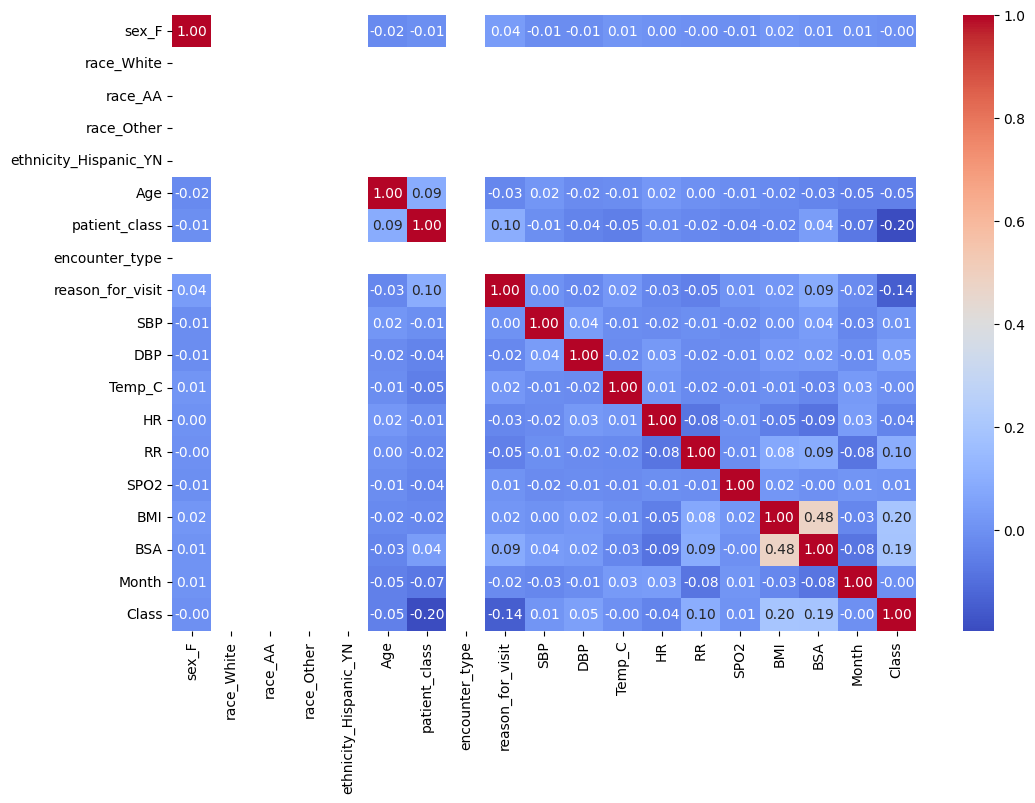

In [ ]:
corrMatrix = data.corr()
plt.figure(figsize=(12, 8))

sns.heatmap(corrMatrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [ ]:
# Preprocessing
data = data.drop(columns=['race_White','race_AA','race_Other',
                          'ethnicity_Hispanic_YN','patient_class',
                          'encounter_type','reason_for_visit', 'SBP',
                          'DBP','Month'])

In [ ]:
# Missing Values
print("\nMissing Values Count:")
print(data.isnull().sum())


Missing Values Count:
sex_F        0
Age          0
Temp_C       0
HR           0
RR           0
SPO2         0
BMI       2255
BSA       1112
Class        0
dtype: int64


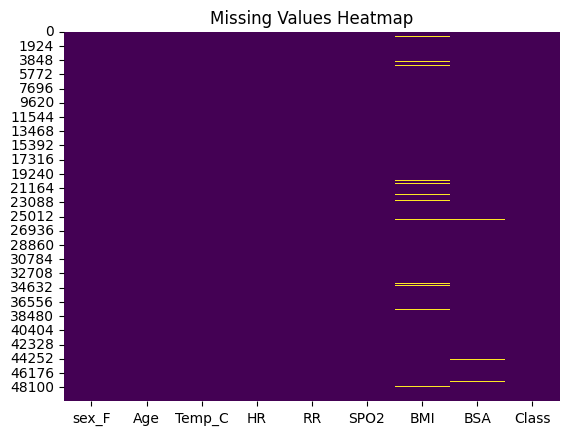

In [ ]:
# Visualize missing data
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
# Fill missing values
data["BMI"] = data["BMI"].fillna(data["BMI"].mean())
data["BSA"] = data["BSA"].fillna(data["BSA"].mean())


In [ ]:
# Missing Values
print("\nMissing Values Count:")
print(data.isnull().sum())


Missing Values Count:
sex_F     0
Age       0
Temp_C    0
HR        0
RR        0
SPO2      0
BMI       0
BSA       0
Class     0
dtype: int64


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
#  Check for Duplicates
print("\nChecking for Duplicate Rows:")
duplicates = data.duplicated().sum()


Checking for Duplicate Rows:



Boxplots for Detecting Outliers:


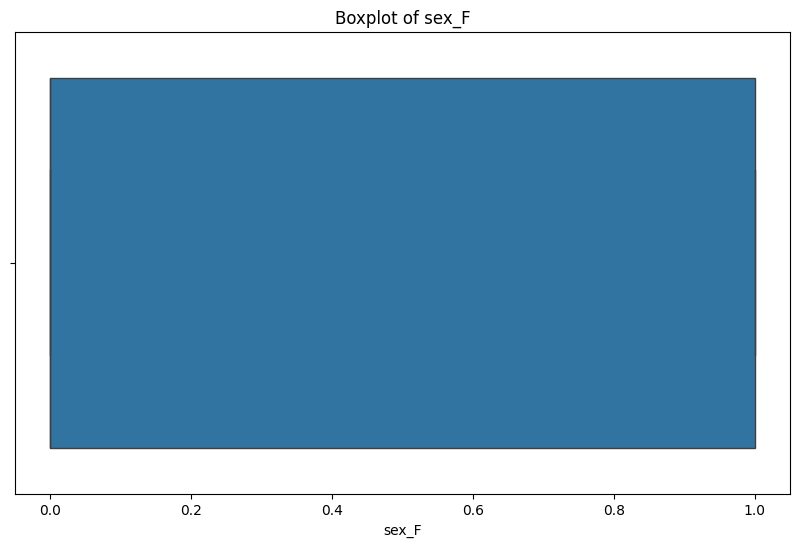

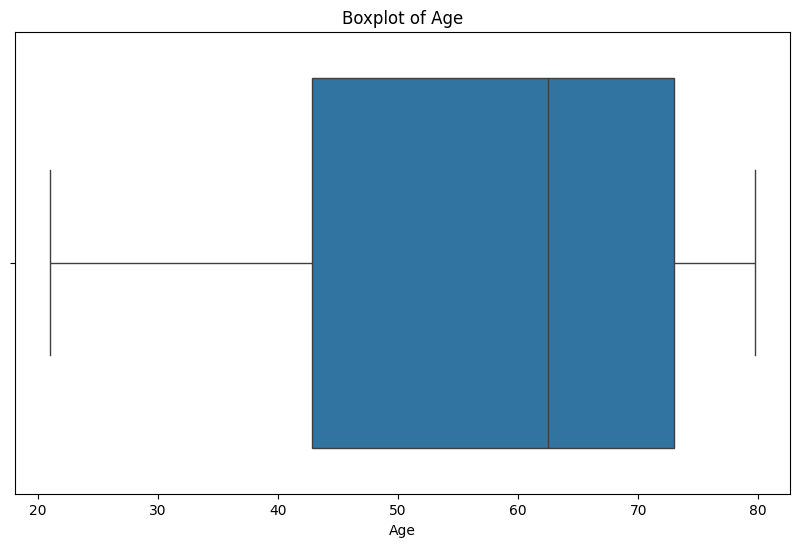

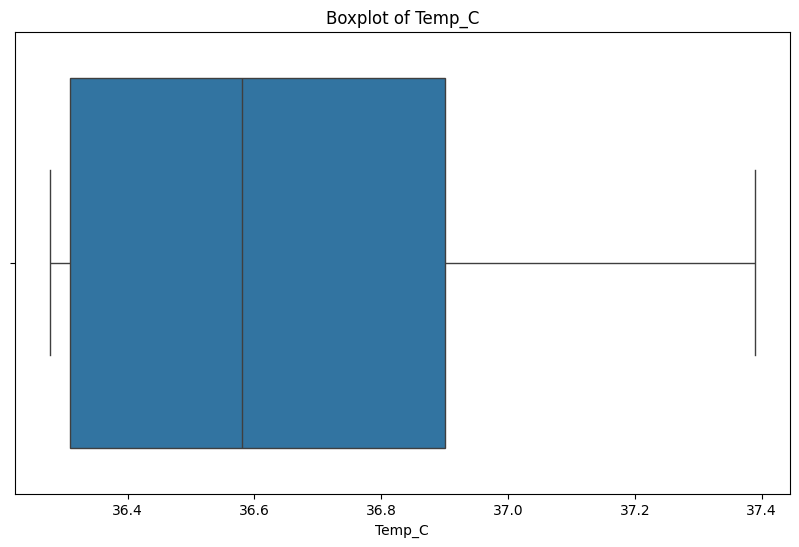

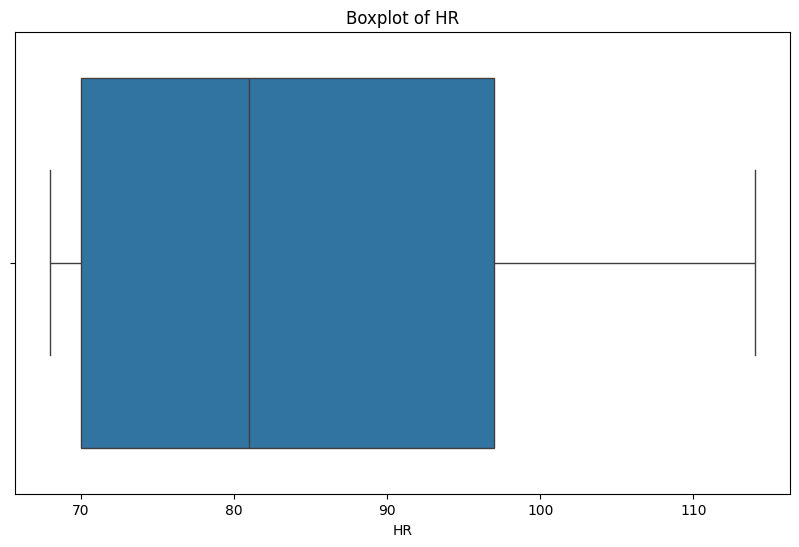

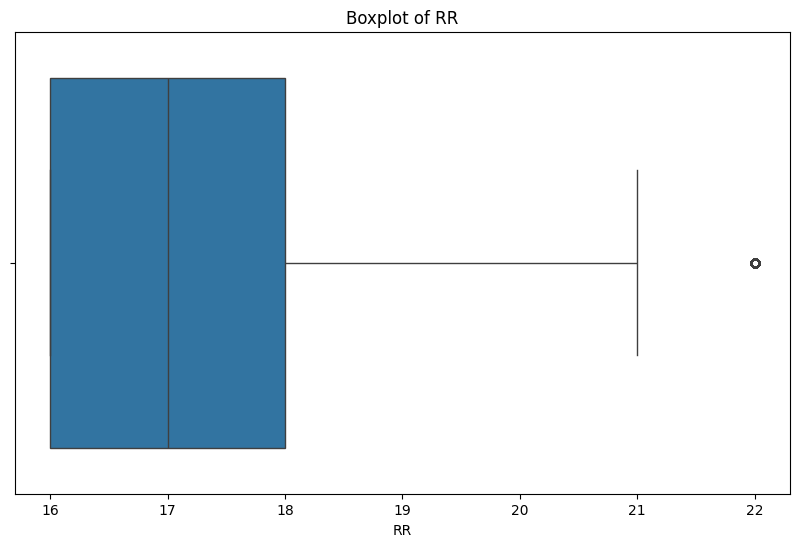

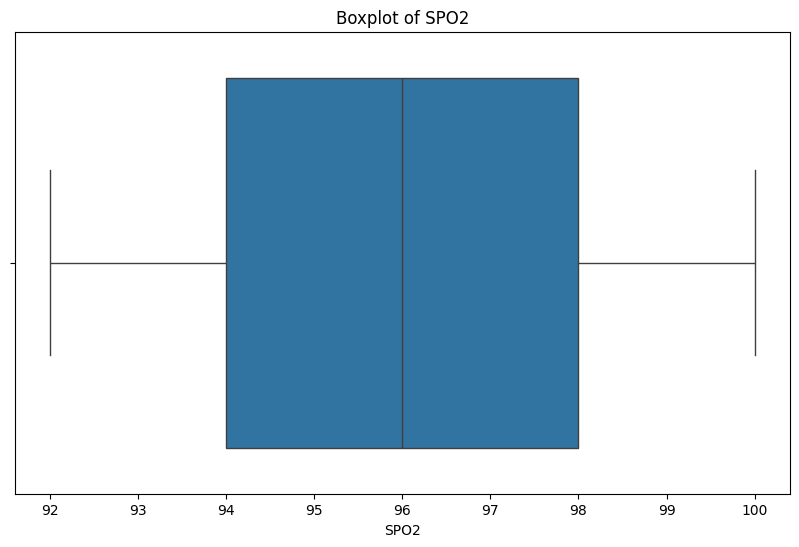

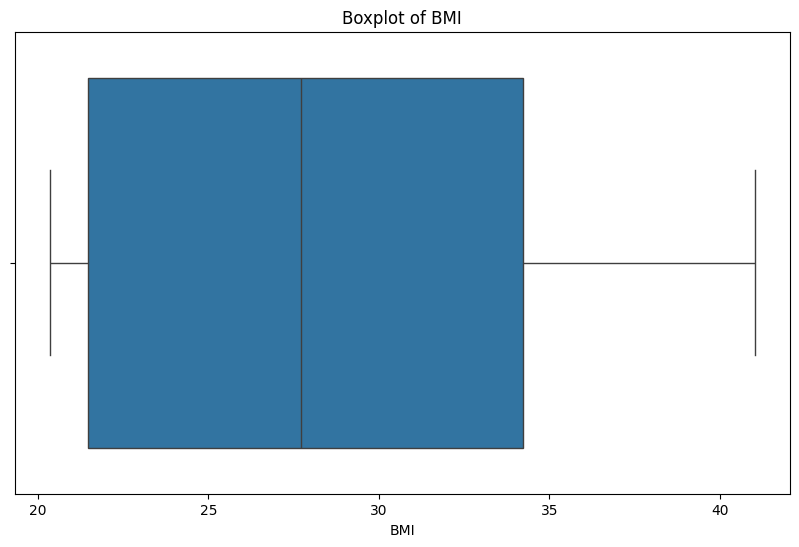

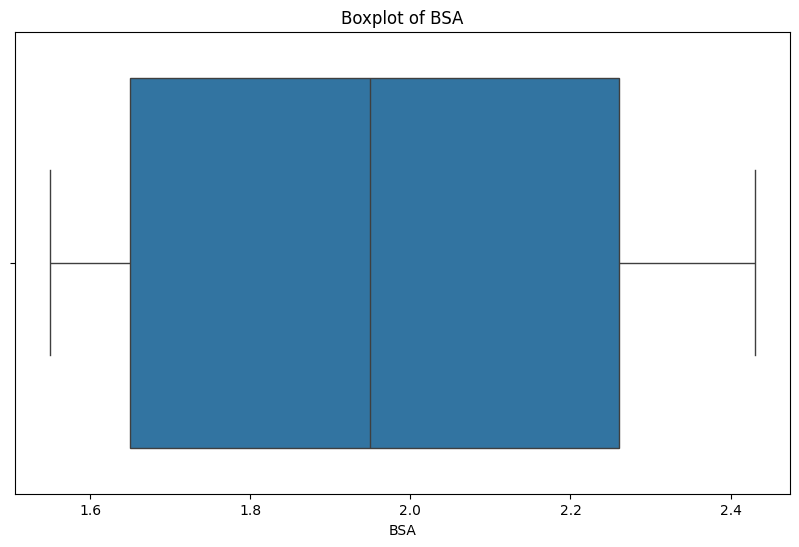

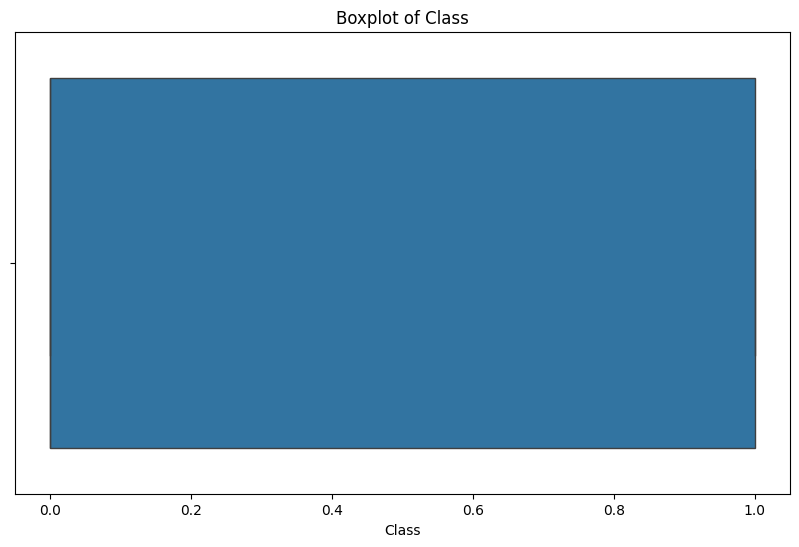

In [ ]:
print("\nBoxplots for Detecting Outliers:")
numerical_columns = data.select_dtypes(include=[np.number]).columns  # Automatically get numerical columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))  # Set figure size
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')  # Title of each boxplot
    plt.show()

In [ ]:
data.drop([40003, 40004], axis=0, inplace=True)

In [ ]:
# Split data
X = data.iloc[:, :-1]
y = data.iloc[:, -1]


In [ ]:
# Before resampling
print("Before resampling:")
print(np.bincount(y))

Before resampling:
[36100 13898]


In [ ]:
# Apply SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
X , y = sm.fit_resample(X, y)


In [ ]:
# After resampling
print("After resampling:")
print(np.bincount(y))

After resampling:
[36100 36100]


### Model Training

We trained the following five models on the dataset initially: **Random Forest**, **Logistic Regression**, **K-Nearest Neighbors (KNN)**, **Naive Bayes**, and **Multilayer Perceptron (MLP)**. We evaluated the models by calculating metrics such as **Precision**, **Recall**, **F1 Score**, and **Accuracy**.

We implemented the models in two ways: one from scratch and one using **scikit-learn**. After comparing the results, we found that the best performance was achieved with **[insert best model here]**. The top-performing models were **[insert top models here]** based on their evaluation scores.

#### Logistic Regression - From Scratch

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# RMSE calculation function
def calculate_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

# Sigmoid function with numerical stability fix
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

# Cost function (Binary Cross-Entropy Loss)
def compute_cost(X, y, weights):
    m = len(y)
    predictions = sigmoid(np.dot(X, weights))
    epsilon = 1e-15
    predictions = np.clip(predictions, epsilon, 1 - epsilon)
    cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

# Gradient Descent
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        # Calculate the predictions
        predictions = sigmoid(np.dot(X, weights))

        # Compute the gradient
        gradients = (1/m) * np.dot(X.T, (predictions - y))

        # Update weights
        weights -= learning_rate * gradients

        # Calculate cost and store it for plotting
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

        if i % 100 == 0:  # Print cost every 100 iterations
            print(f"Iteration {i}: Cost = {cost}")

    return weights, cost_history

# Logistic Regression Model
def logistic_regression(X, y, learning_rate=0.01, iterations=1000):
    # Initialize weights
    weights = np.zeros(X.shape[1])

    # Perform gradient descent to optimize weights
    optimized_weights, cost_history = gradient_descent(X, y, weights, learning_rate, iterations)

    return optimized_weights, cost_history

# Prediction function
def predict(X, weights):
    predictions = sigmoid(np.dot(X, weights))
    return predictions  # Return continuous values for RMSE calculation

# Assuming 'data' is your DataFrame and is already loaded
X = data.iloc[:, :-1].values  # Convert to numpy array
y = data.iloc[:, -1].values   # Convert to numpy array

# Feature scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the logistic regression model
weights, cost_history = logistic_regression(X_train, y_train, learning_rate=0.1, iterations=1000)

# Make predictions on the test set
y_pred = predict(X_test, weights)

# Convert predicted probabilities to binary predictions for accuracy, precision, recall, F1
y_pred_binary = [1 if i > 0.5 else 0 for i in y_pred]

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Calculate RMSE
rmse = calculate_rmse(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"RMSE: {rmse}")


Iteration 0: Cost = 0.6915197137719032
Iteration 100: Cost = 0.6705829621832691
Iteration 200: Cost = 0.6705541891779285
Iteration 300: Cost = 0.670553986513809
Iteration 400: Cost = 0.6705539837503264
Iteration 500: Cost = 0.6705539836835903
Iteration 600: Cost = 0.6705539836803933
Iteration 700: Cost = 0.670553983680185
Iteration 800: Cost = 0.6705539836801704
Iteration 900: Cost = 0.6705539836801695
Accuracy: 0.6134
Precision: 0.38046552099195124
Recall: 0.6320925189736176
F1 Score: 0.47501357957631724
RMSE: 0.4880839349829842


#### Logistic Regression - From Scikit Learn

In [ ]:
# Logistic Regression - From Scikit Learn
X = data.iloc[: , :-1]
y = data.iloc[: , -1]

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2,random_state=0 )

#Create and Train the Logistic Regression Model
from sklearn.linear_model import LogisticRegressionCV

model = LogisticRegressionCV(cv=5, scoring='accuracy', max_iter=200)
model=model.fit(X_train,y_train)

y_pred = model.predict(X_test)

from sklearn.metrics          import accuracy_score
from sklearn.metrics          import precision_score
from sklearn.metrics          import recall_score
from sklearn.metrics          import f1_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.715
Precision: 0.482
Recall: 0.028
F1 Score: 0.054


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))
rms

0.5337602458033007

#### Randomn Forest - From Scratch

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

# Helper function for train-test split
def custom_train_test_split(X, y, test_size=0.2):
    indices = np.random.permutation(len(X))
    split = int(len(X) * (1 - test_size))
    return X[indices[:split]], X[indices[split:]], y[indices[:split]], y[indices[split:]]

# Simplified Decision Tree
class SimpleDecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.tree = self._build_tree(np.array(X), np.array(y))  # Convert to numpy arrays

    def _build_tree(self, X, y, depth=0):
        if len(np.unique(y)) == 1 or (self.max_depth and depth == self.max_depth):
            return np.bincount(y).argmax()
        feature, threshold = self._best_split(X, y)
        left = X[:, feature] <= threshold
        return {
            'feature': feature, 'threshold': threshold,
            'left': self._build_tree(X[left], y[left], depth + 1),
            'right': self._build_tree(X[~left], y[~left], depth + 1)
        }

    def _best_split(self, X, y):
        best_gini, best_feature, best_thresh = float('inf'), None, None
        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for thresh in thresholds:
                left, right = y[X[:, feature] <= thresh], y[X[:, feature] > thresh]
                gini = self._gini(left, right)
                if gini < best_gini:
                    best_gini, best_feature, best_thresh = gini, feature, thresh
        return best_feature, best_thresh

    def _gini(self, left, right):
        total = len(left) + len(right)
        gini = lambda y: 1 - sum((np.bincount(y) / len(y)) ** 2) if len(y) > 0 else 0  # Handle empty splits
        return (len(left) / total) * gini(left) + (len(right) / total) * gini(right)

    def predict(self, X):
        return np.array([self._predict_row(row, self.tree) for row in np.array(X)])  # Convert X to numpy array

    def _predict_row(self, row, tree):
        if isinstance(tree, dict):
            if row[tree['feature']] <= tree['threshold']:
                return self._predict_row(row, tree['left'])
            return self._predict_row(row, tree['right'])
        return tree

# Random Forest
class SimpleRandomForest:
    def __init__(self, n_estimators=5, max_depth=3):
        self.n_estimators = n_estimators
        self.trees = [SimpleDecisionTree(max_depth=max_depth) for _ in range(n_estimators)]

    def fit(self, X, y):
        X = np.array(X)  # Ensure numpy array
        y = np.array(y)
        for tree in self.trees:
            indices = np.random.choice(len(X), len(X), replace=True)
            tree.fit(X[indices], y[indices])

    def predict(self, X):
        X = np.array(X)  # Ensure numpy array
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)




X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Use sklearn's train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train model
rf = SimpleRandomForest(n_estimators=50, max_depth=3)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"RMSE: {rmse:.2f}")


Accuracy: 71.57%
Precision: 0.51
Recall: 0.72
F1 Score: 0.60
RMSE: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Randomn Forest - From Scikit Learn




In [ ]:
X = data.iloc[: , :-1]
y = data.iloc[: , -1]

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2,random_state=0 )

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0, n_estimators = 200)
model=model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics          import accuracy_score
from sklearn.metrics          import precision_score
from sklearn.metrics          import recall_score
from sklearn.metrics          import f1_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred.round()))
print('Precision: %.3f' % precision_score(y_test, y_pred.round()))
print('Recall: %.3f' % recall_score(y_test, y_pred.round()))
print('F1 Score: %.3f' % f1_score(y_test, y_pred.round()))


Accuracy: 0.746
Precision: 0.589
Recall: 0.355
F1 Score: 0.443


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))
rms

0.40821516079146297

#### K Nearest Neighbours - From Scratch


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from collections import Counter

# Define the KNN class
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Assume `data` is a pandas DataFrame with appropriate columns
X = data.loc[:, 'sex_F':'BSA'].values  # Convert to numpy array
y = data.loc[:, 'Class'].values  # Convert to numpy array

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN model
knn = KNN(k=3)
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"RMSE: {rmse:.2f}")


Accuracy: 0.69
Precision: 0.67
Recall: 0.69
F1 Score: 0.67
RMSE: 0.56


#### K Nearest Neighbours - From Scikit Learn





In [ ]:
# KNN classification labels
from sklearn.neighbors import KNeighborsClassifier

X = data.loc[:,'sex_F':'BSA']
y = data.loc[:,'Class']

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2,random_state=0 )

# Trains the model
n_neighbors = 15
model = KNeighborsClassifier(n_neighbors)
model=model.fit(X_train,y_train)

y_pred = model.predict(X_test)

from sklearn.metrics          import accuracy_score
from sklearn.metrics          import precision_score
from sklearn.metrics          import recall_score
from sklearn.metrics          import f1_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred.round()))
print('Precision: %.3f' % precision_score(y_test, y_pred.round()))
print('Recall: %.3f' % recall_score(y_test, y_pred.round()))
print('F1 Score: %.3f' % f1_score(y_test, y_pred.round()))


Accuracy: 0.716
Precision: 0.501
Recall: 0.191
F1 Score: 0.276


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))
rms

0.5330103188494572

#### Multi Layer Perceptron - From Scratch


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score,mean_squared_error,classification_report


# Split data into features and target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adjust labels to be zero-indexed if needed
y_train = y_train - y_train.min()
y_test = y_test - y_test.min()

# Define the MLP class
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.001, epochs=100):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs

        # Initialize weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.01
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.01
        self.b2 = np.zeros((1, self.output_size))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return z * (1 - z)

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2

    def backward(self, X, y, output):
        m = X.shape[0]
        y_one_hot = np.zeros((m, self.output_size))
        y_one_hot[np.arange(m), y] = 1

        dZ2 = output - y_one_hot
        dW2 = np.dot(self.a1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        return dW1, db1, dW2, db2

    def update_parameters(self, dW1, db1, dW2, db2):
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    def train(self, X_train, y_train):
        for epoch in range(self.epochs):
            output = self.forward(X_train)
            dW1, db1, dW2, db2 = self.backward(X_train, y_train, output)
            self.update_parameters(dW1, db1, dW2, db2)
            if epoch % 10 == 0:
                loss = -np.mean(np.log(output[np.arange(X_train.shape[0]), y_train]))
                print(f'Epoch {epoch}/{self.epochs}, Loss: {loss:.4f}')

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)

# Initialize the MLP
input_size = X_train.shape[1]
hidden_size = 128  # You can adjust this value
output_size = len(np.unique(y_train))  # Number of classes
learning_rate = 0.001
epochs = 100

mlp = MLP(input_size, hidden_size, output_size, learning_rate, epochs)

# Train the MLP
mlp.train(X_train.values, y_train.values)

# Make predictions
y_pred = mlp.predict(X_test.values)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"RMSE: {rmse:.2f}")


Epoch 0/100, Loss: 0.7104
Epoch 10/100, Loss: 0.6618
Epoch 20/100, Loss: 0.6337
Epoch 30/100, Loss: 0.6170
Epoch 40/100, Loss: 0.6069
Epoch 50/100, Loss: 0.6008
Epoch 60/100, Loss: 0.5970
Epoch 70/100, Loss: 0.5947
Epoch 80/100, Loss: 0.5933
Epoch 90/100, Loss: 0.5923
Accuracy: 72.33%
Precision: 0.52
Recall: 0.72
F1 Score: 0.61
RMSE: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Multi Layer Perceptron - From Scikit Learn

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error, accuracy_score, classification_report

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Encode categorical data
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

X = X.apply(pd.to_numeric).values
y = y.values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train MLP Classifier
mlp_sklearn = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=100, random_state=42)
mlp_sklearn.fit(X_train, y_train)

# Predictions
y_pred_sklearn = mlp_sklearn.predict(X_test)

# Metrics
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn, average="weighted")
recall_sklearn = recall_score(y_test, y_pred_sklearn, average="weighted")
f1_sklearn = f1_score(y_test, y_pred_sklearn, average="weighted")
rmse_sklearn = np.sqrt(mean_squared_error(y_test, y_pred_sklearn))

# Display metrics
print(f"Accuracy: {accuracy_sklearn * 100:.2f}%")
print(f"Precision: {precision_sklearn:.2f}")
print(f"Recall: {recall_sklearn:.2f}")
print(f"F1 Score: {f1_sklearn:.2f}")
print(f"RMSE: {rmse_sklearn:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_sklearn))


Accuracy: 72.25%
Precision: 0.67
Recall: 0.72
F1 Score: 0.61
RMSE: 0.53

Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84     10830
           1       0.54      0.01      0.03      4170

    accuracy                           0.72     15000
   macro avg       0.63      0.50      0.43     15000
weighted avg       0.67      0.72      0.61     15000



### XStack Model

In [ ]:
!pip install joblib
import joblib
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, mean_squared_error
import numpy as np

# Assuming `data` is already defined (e.g., a pandas DataFrame)

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train base models
logreg = LogisticRegressionCV(cv=5, scoring='accuracy', max_iter=500, random_state=42)
logreg.fit(X_train, y_train)

mlp_sklearn = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=1000, random_state=42)
mlp_sklearn.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Make predictions (probabilities)
logreg_pred_probs = logreg.predict_proba(X_test)[:, 1]
mlp_pred_probs = mlp_sklearn.predict_proba(X_test)[:, 1]
rf_pred_probs = rf.predict_proba(X_test)[:, 1]

# Train meta model (blender) using RandomForest
blender = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)
blender.fit(np.column_stack([logreg_pred_probs, mlp_pred_probs, rf_pred_probs]), y_test)

# Predictions from the stacked model
stack_pred_probs = blender.predict_proba(np.column_stack([logreg_pred_probs, mlp_pred_probs, rf_pred_probs]))[:, 1]
stack_pred = np.round(stack_pred_probs).astype(int)

# Calculate individual model contributions to the stacked model
logreg_contrib = blender.feature_importances_[0]
mlp_contrib = blender.feature_importances_[1]
rf_contrib = blender.feature_importances_[2]

# Output the contribution percentages of each base model
print(f"LogReg Contribution to Final Prediction: {logreg_contrib * 100:.2f}%")
print(f"MLP Contribution to Final Prediction: {mlp_contrib * 100:.2f}%")
print(f"RF Contribution to Final Prediction: {rf_contrib * 100:.2f}%")

# Evaluate stacked model
accuracy = accuracy_score(y_test, stack_pred)
f1 = f1_score(y_test, stack_pred)
precision = precision_score(y_test, stack_pred)
recall = recall_score(y_test, stack_pred)
rmse = np.sqrt(mean_squared_error(y_test, stack_pred_probs))

print("\n------------------------------\n")
print("Stacked Model Evaluation:")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("RMSE:", rmse)

# Save the models
joblib.dump(logreg, 'logreg_model.pkl')
joblib.dump(mlp_sklearn, 'mlp_model.pkl')
joblib.dump(rf, 'rf_model.pkl')
joblib.dump(blender, 'stacked_model.pkl')

print("Models saved successfully!")


LogReg Contribution to Final Prediction: 20.98%
MLP Contribution to Final Prediction: 22.21%
RF Contribution to Final Prediction: 56.81%

------------------------------

Stacked Model Evaluation:
Accuracy: 0.8204
F1 Score: 0.6190072125583369
Precision: 0.7797969000534474
Recall: 0.5131902919451284
RMSE: 0.35870339038682303
Models saved successfully!


### Comparison :

| Model                  | Implementation | Accuracy | Precision | Recall | F1 Score | RMSE      |
|------------------------|----------------|----------|-----------|--------|----------|-----------|
| Logistic Regression    | Scratch        | 0.6134   | 0.3804    | 0.6320 | 0.475    | 0.488     |
| Logistic Regression    | Scikit-learn   | 0.715    | 0.482     | 0.028  | 0.054    | 0.533     |
| Random Forest          | S| K-Nearest Neighbors    | Scratch        | 0.69     | 0.67      | 0.69   | 0.67     | 0.56      |
| K-Nearest Neighbors    | Scikit-learn   | 0.716    | 0.501     | 0.191  | 0.276    | 0.533     |
| Multi-Layer Perceptron | Scratch        | 0.7233   | 0.52      | 0.72   | 0.61     | 0.53      |
| Multi-Layer Perceptron | Scikit-learn   | 0.7225   | 0.67      | 0.72   | 0.61     | 0.53      |
| Stacked Model          | -              | 0.8204   | 0.7798    | 0.5132 | 0.6190   | 0.3587    | bold text

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=777233bac63bdf5c88050e3367fcd11724aa2194d76fd7db278d6522717435d7
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
# Import necessary libraries
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
import pandas as pd


if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=data.columns[:-1])

# Initialize the LIME explainer
lime_explainer = LimeTabularExplainer(
    training_data=X_train.values,
    training_labels=None,
    feature_names=X_train.columns,
    class_names=['Class 0', 'Class 1'],
    mode='classification'
)


test_instance = X_test.iloc[27].values

explanation = lime_explainer.explain_instance(
    data_row=test_instance,
    predict_fn=rf.predict_proba
)

# Visualize the explanation for the test instance
explanation.show_in_notebook(show_table=True)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


<ipython-input-24-f8acba20b866>:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_table = pd.concat([result_table, result_df], ignore_index=True)


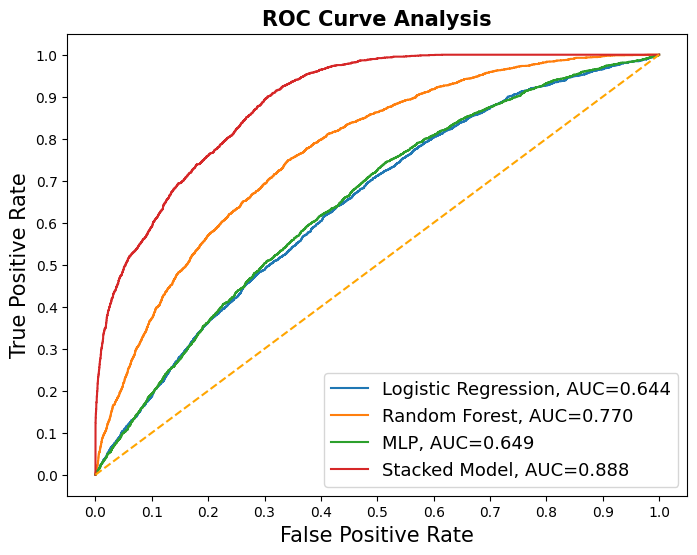

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, mean_squared_error

# Define a result_table to store the fpr, tpr, and auc
result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])

# Calculate the ROC curve and AUC for each model
for cls, pred_probs in zip(['Logistic Regression', 'Random Forest', 'MLP', 'Stacked Model'],
                           [logreg_pred_probs, rf_pred_probs, mlp_pred_probs, stack_pred_probs]):
    fpr, tpr, _ = roc_curve(y_test, pred_probs)
    auc_score = auc(fpr, tpr)
    result_df = pd.DataFrame({'classifiers': [cls],
                              'fpr': [fpr],
                              'tpr': [tpr],
                              'auc': [auc_score]})

    # Drop rows with all NaN values before concatenation (if any)
    result_df = result_df.dropna(how='all')

    # Concatenate the result_df with result_table
    result_table = pd.concat([result_table, result_df], ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# Plot the ROC curve
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.savefig('ROC.pdf', bbox_inches='tight')
plt.show()


### Risk Assesement & Testing Of Model :

In [ ]:
import joblib
import numpy as np
import pandas as pd

# Load the saved models
logreg = joblib.load('logreg_model.pkl')
mlp_sklearn = joblib.load('mlp_model.pkl')
rf = joblib.load('rf_model.pkl')
blender = joblib.load('stacked_model.pkl')

# Input data (new sample)
data = {
    "sex_F": 1,
    "Age": 65,
    "Temp_C": 38.5,
    "HR": 110,
    "RR": 18,
    "SPO2": 92,
    "BMI": 32,
    "BSA": 2.0,
}

# Convert the input data to a pandas DataFrame
input_df = pd.DataFrame([data])

# Make predictions (probabilities) using base models
logreg_pred_probs = logreg.predict_proba(input_df)[:, 1]
mlp_pred_probs = mlp_sklearn.predict_proba(input_df)[:, 1]
rf_pred_probs = rf.predict_proba(input_df)[:, 1]

# Use the stacked model (blender) to make the final prediction
stack_pred_probs = blender.predict_proba(np.column_stack([logreg_pred_probs, mlp_pred_probs, rf_pred_probs]))[:, 1]
stack_pred = np.round(stack_pred_probs).astype(int)

# Output the final class prediction
print(f"Predicted class: {stack_pred[0]}")


Predicted class: 0


In [ ]:
import pandas as pd

def risk_assessment(prediction, sex_F, Age , Temp_C, HR, RR, SPO2, BMI, BSA ):
    # Initialize risk score
    risk_score = 0

    # Add weight based on predicted class
    if prediction == 1:
        risk_score += 5  # High-risk patients
        print("Prediction: High-risk patient (+5)")
    else:
        risk_score += 1  # Low-risk patients
        print("Prediction: Low-risk patient (+1)")

    # Risk based on age
    if Age >= 60:
        risk_score += 3  # Older age is a higher risk
        print("Age: 60 or older (+3)")
    elif Age < 30:
        risk_score -= 1  # Younger patients may have lower risk
        print("Age: Less than 30 (-1)")

    # Heart rate (HR)
    if HR > 100:
        risk_score += 3
        print("Heart Rate: High (>100) (+3)")
    elif HR < 60:
        risk_score -= 1
        print("Heart Rate: Low (<60) (-1)")

    # Respiratory rate (RR)
    if RR > 20:
        risk_score += 2
        print("Respiratory Rate: High (>20) (+2)")
    elif RR < 10:
        risk_score -= 1
        print("Respiratory Rate: Low (<10) (-1)")

    # Oxygen saturation (SPO2)
    if SPO2 < 90:
        risk_score += 4
        print("Oxygen Saturation: Low (<90) (+4)")

    # BMI (Handle missing BMI)
    if pd.isna(BMI) or BMI == 0:
        risk_score -= 2
        print("BMI: Missing or zero (-2)")
    elif BMI >= 30:
        risk_score += 3
        print("BMI: Over 30 (+3)")
    elif BMI < 18.5:
        risk_score -= 2
        print("BMI: Less than 18.5 (-2)")


    # Temperature (Temp_C)
    if Temp_C >= 38:
        risk_score += 3
        print("Temperature: Fever (>38°C) (+3)")
    elif Temp_C < 35:
        risk_score -= 1
        print("Temperature: Low (<35°C) (-1)")

    # Risk classification based on the risk score
    if risk_score >= 15:
        return f"High Risk (Score: {risk_score})"
    elif 8 <= risk_score < 15:
        return f"Moderate Risk (Score: {risk_score})"
    else:
        return f"Low Risk (Score: {risk_score})"


data = {
    "prediction": 0,
    "sex_F": 1,
    "Age": 65,
    "Temp_C": 38.5,
    "HR": 110,
    "RR": 18,
    "SPO2": 92,
    "BMI": 32,
    "BSA": 2.0,
}

# Run the function
risk = risk_assessment(**data)
print(f"Patient's risk classification: {risk}")


Prediction: Low-risk patient (+1)
Age: 60 or older (+3)
Heart Rate: High (>100) (+3)
BMI: Over 30 (+3)
Temperature: Fever (>38°C) (+3)
Patient's risk classification: Moderate Risk (Score: 13)
